In [6]:
import pandas as pd  # Pandas library ko import karte hai, jo data manipulation aur analysis ke liye use hoti hai
import mysql.connector  # MySQL connector ko import karte hai, jo Python aur MySQL ke beech connection establish karta hai
import os  # OS module ko import karte hai, jo file aur directory path handle karne ke liye kaam aata hai

# CSV files aur unke corresponding MySQL table names ki list banate hai
csv_files = [
    ('customers.csv', 'customers'),  # customers.csv file ka data `customers` table me jayega
    ('orders.csv', 'orders'),  # orders.csv file ka data `orders` table me jayega
    ('products.csv', 'products'),  # products.csv ka data `products` table me jayega
    ('order_items.csv', 'order_items')# Added payments.csv for specific handling
    ('payments.csv', 'payments'),
]

# MySQL database ke saath connection establish karte hai
conn = mysql.connector.connect(
    host='localhost',  # MySQL server ka host name
    user='root',  # MySQL username
    password='Krish#554466',  # MySQL password
    database='ecommerce'  # MySQL database ka naam
)
cursor = conn.cursor()  # Cursor object banate hai jo queries execute karne ke kaam aata hai

# CSV files ke folder ka path specify karte hai
folder_path = 'C:\\Users\\Windows_10\\Downloads\\ecommerce-data'  # Folder ka path jahan CSV files stored hain

# Ek function banate hai jo Pandas data types ko SQL data types me convert kare
def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):  # Agar column integer type ka hai
        return 'INT'  # SQL me uska type INT hoga
    elif pd.api.types.is_float_dtype(dtype):  # Agar column float type ka hai
        return 'FLOAT'  # SQL me uska type FLOAT hoga
    elif pd.api.types.is_bool_dtype(dtype):  # Agar column boolean type ka hai
        return 'BOOLEAN'  # SQL me uska type BOOLEAN hoga
    elif pd.api.types.is_datetime64_any_dtype(dtype):  # Agar column datetime type ka hai
        return 'DATETIME'  # SQL me uska type DATETIME hoga
    else:  # Agar koi aur data type hai (e.g., string)
        return 'TEXT'  # SQL me uska type TEXT hoga

# Har CSV file ke liye loop chalaate hai
for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)  # File ka full path banate hai
    
    # CSV file ko Pandas DataFrame me read karte hai
    df = pd.read_csv(file_path)
    
    # NaN values ko None se replace karte hai taaki SQL NULL ke roop me samjhe
    df = df.where(pd.notnull(df), None)
    
    # Debugging ke liye CSV file aur NaN values ko print karte hai
    print(f"Processing {csv_file}")  # Bataata hai kaunsi file process ho rahi hai
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")  # Har column ke NaN values count karega

    # Column names ko clean karte hai (spaces, hyphens, aur dots ko underscores se replace karte hai)
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # SQL CREATE TABLE statement generate karte hai appropriate data types ke saath
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)  # Table create karne ka query execute karte hai

    # Har row ko table me insert karte hai
    for _, row in df.iterrows():
        # Row ke values ko tuple me convert karte hai aur NaN/None ko handle karte hai
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)  # Insert query execute karte hai

    # Har CSV file ke baad transaction commit karte hai
    conn.commit()

# Connection close karte hai
conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [9]:
import pandas as pd  # Pandas library ko import karte hain, jo data analysis aur manipulation ke liye use hoti hai.
import matplotlib.pyplot as plt  # Matplotlib ko import karte hain, jo data visualization ke liye graphs aur charts banata hai.
import seaborn as sns  # Seaborn ko import karte hain, jo Matplotlib ke upar built ek library hai, aur advanced visualizations provide karti hai.
import mysql.connector  # MySQL connector library ko import karte hain, jo Python aur MySQL database ke beech connection establish karne ke kaam aati hai.

# MySQL database se connection establish karte hain
db = mysql.connector.connect( 
    host='localhost',  # MySQL server ka host name ya IP address specify karte hain
    username='root',  # MySQL ka username, yahan default 'root' rakha gaya hai
    password='Krish#554466',  # User ke MySQL account ka password
    database='ecommerce'  # Database ka naam jisme queries run karni hain
)

# Cursor object banate hain jo database ke saath interact karne ke liye queries execute karega
cur = db.cursor()


# List all unique cities where customers are located.

In [14]:
# SQL query to fetch unique customer cities
query = """ SELECT DISTINCT customer_city FROM customers """
cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count of orders for each year

   Year  Order Count
0  2016          329
1  2017        45101
2  2018        54011


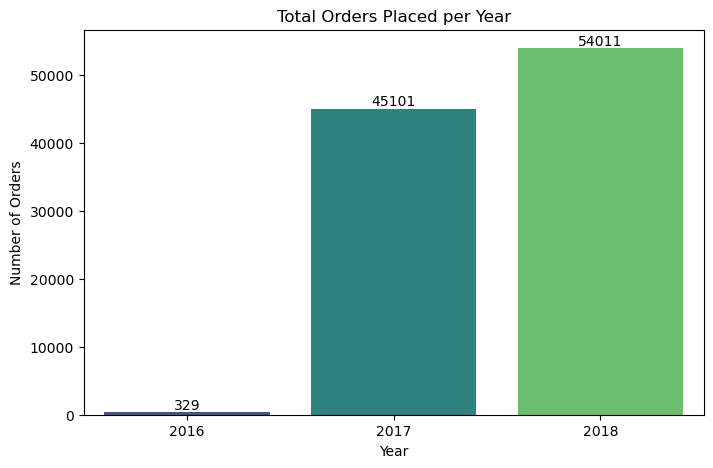

In [32]:
# Query to get the count of orders for each year
query = """ 
    SELECT YEAR(order_purchase_timestamp) AS order_year, COUNT(order_id) 
    FROM orders 
    GROUP BY YEAR(order_purchase_timestamp)
    ORDER BY order_year;
"""
cur.execute(query)
data = cur.fetchall()


# Converting the data into a DataFrame for easy plotting
df = pd.DataFrame(data, columns=["Year", "Order Count"])
print(df)

# Plotting the data as a bar chart
plt.figure(figsize=(8, 5))
ax=sns.barplot(x="Year", y="Order Count", data=df, palette="viridis")
ax.bar_label(ax.containers[0])
# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.title("Total Orders Placed per Year")

# Display the plot
plt.show()

# Find the total sales per category.

In [25]:
query = """ select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,FASHION BAGS AND ACCESSORIES,218158.28
4,BED TABLE BATH,1712553.67
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# Calculate the percentage of orders that were paid in installments.

In [26]:
query = """ select ((sum(case when payment_installments >= 1 then 1
else 0 end))/count(*))*100 from payments
"""

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

# Count the number of customers from each state.

   state  customer_count
0     SP           41746
4     RJ           12852
2     MG           11635
5     RS            5466
3     PR            5045
1     SC            3637
9     BA            3380
13    DF            2140
8     ES            2033
7     GO            2020
15    PE            1652
12    CE            1336
6     PA             975
16    MT             907
10    MA             747
11    MS             715
21    PB             536
23    PI             495
14    RN             485
19    AL             413
25    SE             350
22    TO             280
20    RO             253
17    AM             148
24    AC              81
18    AP              68
26    RR              46


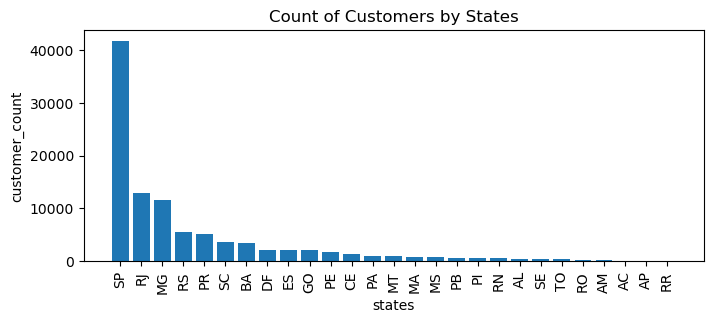

In [29]:
query = """ select customer_state ,count(customer_id)
from customers group by customer_state
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count" ])
df = df.sort_values(by = "customer_count", ascending= False)

plt.figure(figsize = (8,3))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by States")
plt.show()

# Calculate the number of orders per month in 2018.

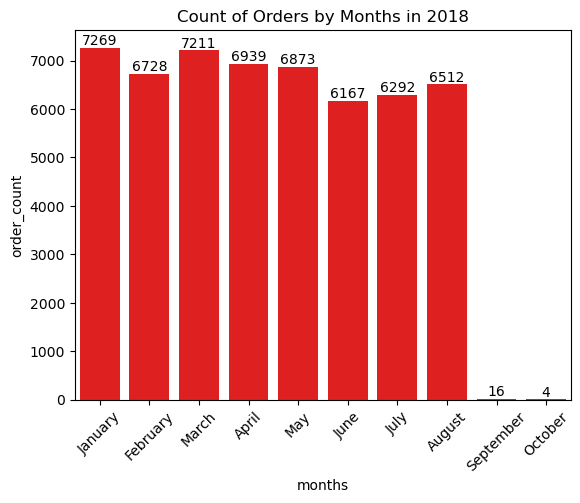

In [30]:
# Writing the SQL query to get the number of orders per month in 2018
query = """ 
select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders 
where year(order_purchase_timestamp) = 2018
group by months
"""

# Executing the query
cur.execute(query)

# Fetching all the results from the query execution
data = cur.fetchall()

# Creating a pandas DataFrame from the fetched data
df = pd.DataFrame(data, columns = ["months", "order_count"])

# Defining the correct order of months to display on the x-axis
o = ["January", "February","March","April","May","June","July","August","September","October"]

# Creating a bar plot using seaborn to visualize the number of orders per month
# 'df["months"]' for x-axis, 'df["order_count"]' for y-axis, and 'order = o' to show months in the correct order
ax = sns.barplot(x = df["months"], y =  df["order_count"], data = df, order = o, color = "red")

# Rotating the x-axis labels for better readability (45-degree angle)
plt.xticks(rotation = 45)

# Adding the order count number on top of each bar in the graph
ax.bar_label(ax.containers[0])

# Setting the title for the plot
plt.title("Count of Orders by Months in 2018")

# Displaying the plot
plt.show()